<a href="https://colab.research.google.com/github/kssmagister/au-notebooks/blob/main/Textanalysen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formale Textanalysen mit Python

## Histogramm der Buchstaben
Ein Histogramm ist eine grafische Darstellung der Häufigkeitsverteilung kardinal skalierter Merkmale.

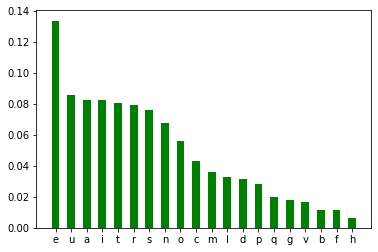

videsutaltastetnivecandidumsoracteneciamsustineantonussilvaelaborantesgeluquefluminaconstiterintacutodissolvefriguslignasuperfocolargereponensatquebenigniusdepromequadrimumsabinaothaliarchemerumdiotapermittedivisceteraquisimulstravereventosaequorefervidodeproeliantisneccupressinecveteresagitanturorniquidsitfuturumcrasfugequaerereetquemforsdierumcumquedabitlucroadponenecdulcisamoresspernepuernequetuchoreasdonecvirenticanitiesabestmorosanuncetcampusetareaelenesquesubnoctemsusurricompositarepetanturhoranuncetlatentisproditorintumogratuspuellaerisusabangulopignusquedereptumlacertisautdigitomalepertinaci


In [37]:
import re
import pandas as pd
import matplotlib.pyplot as plt

test = """Vides ut alta stet nive candidum
Soracte nec iam sustineant onus
     silvae laborantes geluque
     flumina constiterint acuto?

Dissolve frigus ligna super foco               5
large reponens atque benignius
     deprome quadrimum Sabina,
     o Thaliarche, merum diota.

Permitte divis cetera, qui simul
stravere ventos aequore fervido               10
     deproeliantis, nec cupressi
     nec veteres agitantur orni.

Quid sit futurum cras, fuge quaerere, et
quem fors dierum cumque dabit, lucro
     adpone nec dulcis amores
     sperne, puer, neque tu choreas,               15

donec virenti canities abest
morosa. Nunc et Campus et areae
     lenesque sub noctem susurri
     composita repetantur hora,

nunc et latentis proditor intumo               20
gratus puellae risus ab angulo
     pignusque dereptum lacertis
     aut digito male pertinaci. """

# remove punctuation, whitespaces, tabs, linebreak, digits
test = re.sub(r"[\n\t\s,.!?\d]*", "", test).lower()

# convert input to list of chars so it is easy to get into pandas 
char_list = list(test)

# create a dataframe where each char is one row
df = pd.DataFrame({'chars': char_list})
# drop all the space characters
df = df[df.chars != ' ']
# add a column for aggregation later
df['num'] = 1
# group rows by character type, count the occurences in each group
# and sort by occurance
df = df.groupby('chars').sum().sort_values('num', ascending=False) / len(df)

plt.bar(df.index, df.num, width=0.5, color='g')
plt.show()

# print test
print(test)

 Wortschatzanalysen


## Lautmuster

### Lautmuster: nur Konsonanten



In [38]:
import re

test = """Vides ut alta stet nive candidum
Soracte nec iam sustineant onus
     silvae laborantes geluque
     flumina constiterint acuto?

Dissolve frigus ligna super foco               5
large reponens atque benignius
     deprome quadrimum Sabina,
     o Thaliarche, merum diota.

Permitte divis cetera, qui simul
stravere ventos aequore fervido               10
     deproeliantis, nec cupressi
     nec veteres agitantur orni.

Quid sit futurum cras, fuge quaerere, et
quem fors dierum cumque dabit, lucro
     adpone nec dulcis amores
     sperne, puer, neque tu choreas,               15

donec virenti canities abest
morosa. Nunc et Campus et areae
     lenesque sub noctem susurri
     composita repetantur hora,

nunc et latentis proditor intumo               20
gratus puellae risus ab angulo
     pignusque dereptum lacertis
     aut digito male pertinaci. """

# remove punctuation, whitespaces, tabs, linebreak, digits
test = re.sub(r"[,.!?\d]*", "", test).lower()

match_pattern_voki = '([aeiou])'
all_match_list = re.findall(match_pattern_voki, test, flags=re.IGNORECASE)
text_voki_neu = re.sub(match_pattern_voki,'',test)
voki = (', '.join(sorted(all_match_list)))
# voki_neu = voki.replace('*','')

print(text_voki_neu)
print(', '.join(all_match_list))




vds t lt stt nv cnddm
srct nc m sstnnt ns
     slv lbrnts glq
     flmn cnsttrnt ct

dsslv frgs lgn spr fc               
lrg rpnns tq bngns
     dprm qdrmm sbn
      thlrch mrm dt

prmtt dvs ctr q sml
strvr vnts qr frvd               
     dprlnts nc cprss
     nc vtrs gtntr rn

qd st ftrm crs fg qrr t
qm frs drm cmq dbt lcr
     dpn nc dlcs mrs
     sprn pr nq t chrs               

dnc vrnt cnts bst
mrs nnc t cmps t r
     lnsq sb nctm ssrr
     cmpst rptntr hr

nnc t ltnts prdtr ntm               
grts pll rss b ngl
     pgnsq drptm lcrts
     t dgt ml prtnc 
i, e, u, a, a, e, i, e, a, i, u, o, a, e, e, i, a, u, i, e, a, o, u, i, a, e, a, o, a, e, e, u, u, e, u, i, a, o, i, e, i, a, u, o, i, o, e, i, u, i, a, u, e, o, o, a, e, e, o, e, a, u, e, e, i, i, u, e, o, e, u, a, i, u, a, i, a, o, a, i, a, e, e, u, i, o, a, e, i, e, i, i, e, e, a, u, i, i, u, a, e, e, e, o, a, e, u, o, e, e, i, o, e, o, e, i, a, i, e, u, e, i, e, e, e, e, a, i, a, u, o, i, u, i, i, u, u, u, a, u, e, u, a, e

### Lautmuster: nur Vokale

In [39]:
import re

test = """Vides ut alta stet nive candidum
Soracte nec iam sustineant onus
     silvae laborantes geluque
     flumina constiterint acuto?

Dissolve frigus ligna super foco               5
large reponens atque benignius
     deprome quadrimum Sabina,
     o Thaliarche, merum diota.

Permitte divis cetera, qui simul
stravere ventos aequore fervido               10
     deproeliantis, nec cupressi
     nec veteres agitantur orni.

Quid sit futurum cras, fuge quaerere, et
quem fors dierum cumque dabit, lucro
     adpone nec dulcis amores
     sperne, puer, neque tu choreas,               15

donec virenti canities abest
morosa. Nunc et Campus et areae
     lenesque sub noctem susurri
     composita repetantur hora,

nunc et latentis proditor intumo               20
gratus puellae risus ab angulo
     pignusque dereptum lacertis
     aut digito male pertinaci. """

# remove punctuation, whitespaces, tabs, linebreak, digits
test = re.sub(r"[,.!?\d]*", "", test).lower()

match_pattern_voki = '([bcdfghlmnpqrstv])'
all_match_list = re.findall(match_pattern_voki, test, flags=re.IGNORECASE)
text_voki_neu = re.sub(match_pattern_voki,'',test)
voki = (', '.join(sorted(all_match_list)))
# voki_neu = voki.replace('*','')

print(text_voki_neu)
print(', '.join(all_match_list))




ie u aa e ie aiu
oae e ia uiea ou
     iae aoae euue
     uia oiei auo

ioe iu ia ue oo               
ae eoe aue eiiu
     eoe uaiu aia
     o aiae eu ioa

eie ii eea ui iu
aee eo aeuoe eio               
     eoeiai e uei
     e eee aiau oi

ui i uuu a ue uaeee e
ue o ieu uue ai uo
     aoe e ui aoe
     ee ue eue u oea               

oe iei aiie ae
ooa u e au e aeae
     eeue u oe uui
     ooia eeau oa

u e aei oio iuo               
au ueae iu a auo
     iuue eeu aei
     au iio ae eiai 
v, d, s, t, l, t, s, t, t, n, v, c, n, d, d, m, s, r, c, t, n, c, m, s, s, t, n, n, t, n, s, s, l, v, l, b, r, n, t, s, g, l, q, f, l, m, n, c, n, s, t, t, r, n, t, c, t, d, s, s, l, v, f, r, g, s, l, g, n, s, p, r, f, c, l, r, g, r, p, n, n, s, t, q, b, n, g, n, s, d, p, r, m, q, d, r, m, m, s, b, n, t, h, l, r, c, h, m, r, m, d, t, p, r, m, t, t, d, v, s, c, t, r, q, s, m, l, s, t, r, v, r, v, n, t, s, q, r, f, r, v, d, d, p, r, l, n, t, s, n, c, c, p, r, s, s, n, c, v, t, r, s, g, t, n, t, r, r

### Lautmuster K-V-K und V-K-V

- File "Lautmusteranalyse.txt" wird automatisch auf den Desktop heruntergeladen.


In [40]:
import re
from google.colab import files

text = """Vides ut alta stet nive candidum
Soracte nec iam sustineant onus
     silvae laborantes geluque
     flumina constiterint acuto?

Dissolve frigus ligna super foco               5
large reponens atque benignius
     deprome quadrimum Sabina,
     o Thaliarche, merum diota.

Permitte divis cetera, qui simul
stravere ventos aequore fervido               10
     deproeliantis, nec cupressi
     nec veteres agitantur orni.

Quid sit futurum cras, fuge quaerere, et
quem fors dierum cumque dabit, lucro
     adpone nec dulcis amores
     sperne, puer, neque tu choreas,               15

donec virenti canities abest
morosa. Nunc et Campus et areae
     lenesque sub noctem susurri
     composita repetantur hora,

nunc et latentis proditor intumo               20
gratus puellae risus ab angulo
     pignusque dereptum lacertis
     aut digito male pertinaci. """

# remove punctuation, whitespaces, tabs, linebreak, digits
text = re.sub(r"[,.!?\d]*", "", text).lower()

# search for pattern K-V-K
pattern = re.compile(r'([^aeiou])([aeiou])(\1)')

# search for pattern V-K-V
pattern2 = re.compile(r'([aeiou])([^aeiou])(\1)')

# replace  pattern in "text"
# replace K-V-K with "---" in text
string = re.sub(pattern, "---", text)
with open("Lautmusteranalyse.txt", "w") as file:
        file.write('\n' + '# Lautmuster K-V-K' + '\n' + string)
        file.close()
#replace V-K-V with "~~~" in text
string2 = re.sub(pattern2, "~~~", text)
with open("Lautmusteranalyse.txt", "a") as file:
        file.write('\n\n' + '# Lautmuster V-K-V' + '\n' + string2)
        file.close()
# replace V-K-V in string
string3 = re.sub(pattern2, "~~~", string)
with open("Lautmusteranalyse.txt", "a") as file:
        file.write('\n\n' + '# Lautmuster K-V-K und V-K-V' + '\n' + string3)
        file.close()

# print 
print("Lautmuster K-V-K\n\n")
print(string)
print("\n\nLautmuster V-K-V\n\n")
print(string2)
print("\n\nLautmuster K-V-K und V-K-V\n\n")
print(string3)

# download "Lautmusteranalyse.txt"
files.download('/content/Lautmusteranalyse.txt')
print('File auf Festplatte gespeichert!')

Lautmuster K-V-K


vides ut alta s--- nive can---um
soracte nec iam ---tineant onus
     silvae laborantes geluque
     flumina cons---erint acuto

dissolve frigus ligna super foco               
large repo---s atque benignius
     deprome quadri--- sabina
     o thaliarche merum diota

permitte divis cetera qui simul
stravere ventos aequore fervido               
     deproeliantis nec cupressi
     nec veteres agitantur orni

quid sit futurum cras fuge quae---e et
quem fors dierum cumque dabit lucro
     adpone nec dulcis amores
     sperne puer neque tu choreas               

donec virenti canities abest
morosa ---c et campus et areae
     lenesque sub noctem ---urri
     composita repetantur hora

---c et latentis proditor intumo               
gratus puellae ri--- ab angulo
     pignusque dereptum lacertis
     aut digito male pertinaci 


Lautmuster V-K-V


vides ut alta stet nive candidum
soracte nec iam sustineant onus
     silvae laborantes gel~~~e
     flumina constiterint a

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File auf Festplatte gespeichert!


## Wortschatzanalysen


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.





Displaying 4 of 4 matches:
 cras , fuge quaerere , et quem fors dierum cumque
ies abest morosa . nunc et campus et areae lenesqu
morosa . nunc et campus et areae lenesque sub noct
 repetantur hora , nunc et latentis proditor intum
None





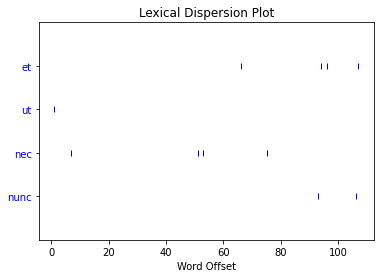




[(',', 11), ('nec', 4), ('.', 4), ('et', 4), ('nunc', 2), ('vides', 1), ('ut', 1), ('alta', 1), ('stet', 1), ('nive', 1)]





In [42]:
import nltk
nltk.download('punkt')

text = """Vides ut alta stet nive candidum
Soracte nec iam sustineant onus
     silvae laborantes geluque
     flumina constiterint acuto?

Dissolve frigus ligna super foco               5
large reponens atque benignius
     deprome quadrimum Sabina,
     o Thaliarche, merum diota.

Permitte divis cetera, qui simul
strauere ventos aequore fervido               10
     deproeliantis, nec cupressi
     nec veteres agitantur orni.

Quid sit futurum cras, fuge quaerere, et
quem fors dierum cumque dabit, lucro
     adpone nec dulcis amores
     sperne, puer, neque tu choreas,               15

donec virenti canities abest
morosa. Nunc et Campus et areae
     lenesque sub noctem susurri
     composita repetantur hora,

nunc et latentis proditor intumo               20
gratus puellae risus ab angulo
     pignusque dereptum lacertis
     aut digito male pertinaci. """.lower()


# tokenize into sentences:
sentences1 = nltk.sent_tokenize(text)
# print(sentences1[:3])

# tokenize into words:
words1 = nltk.word_tokenize(text)
words1_d = nltk.word_tokenize(text, language="german")
# print(words1)

my_document = nltk.Text(words1)
my_document_d =nltk.Text(words1_d)

print("\n\n")
print(my_document_d.concordance("et", width=50))
print("\n\n")

my_document_d.dispersion_plot(["et", "ut", "nec", "nunc"])

# get word frequencies
frequencies = nltk.FreqDist(my_document)
#print(frequencies['Holmes'])
most_common = frequencies.most_common(10)
print("\n\n")
print(most_common)
print("\n\n")

# Aufgaben erstellen
1. Vokale (alle oder einen Teil) weglassen -> Auswendig das Fehlende ergänzen.
2. Lückentexte

In [41]:
# replace vowels with for-loop
test = """Vides ut alta stet nive candidum
Soracte nec iam sustineant onus
     silvae laborantes geluque
     flumina constiterint acuto?

Dissolve frigus ligna super foco               5
large reponens atque benignius
     deprome quadrimum Sabina,
     o Thaliarche, merum diota.

Permitte divis cetera, qui simul
stravere ventos aequore fervido               10
     deproeliantis, nec cupressi
     nec veteres agitantur orni.

Quid sit futurum cras, fuge quaerere, et
quem fors dierum cumque dabit, lucro
     adpone nec dulcis amores
     sperne, puer, neque tu choreas,               15

donec virenti canities abest
morosa. Nunc et Campus et areae
     lenesque sub noctem susurri
     composita repetantur hora,

nunc et latentis proditor intumo               20
gratus puellae risus ab angulo
     pignusque dereptum lacertis
     aut digito male pertinaci. """.lower()

for i in test:
  if i.lower() in 'aeiou':
    print('-',end='')
  else:
    print(i,end='')


v-d-s -t -lt- st-t n-v- c-nd-d-m
s-r-ct- n-c --m s-st-n--nt -n-s
     s-lv-- l-b-r-nt-s g-l-q--
     fl-m-n- c-nst-t-r-nt -c-t-?

d-ss-lv- fr-g-s l-gn- s-p-r f-c-               5
l-rg- r-p-n-ns -tq-- b-n-gn--s
     d-pr-m- q--dr-m-m s-b-n-,
     - th-l--rch-, m-r-m d--t-.

p-rm-tt- d-v-s c-t-r-, q-- s-m-l
str-v-r- v-nt-s --q--r- f-rv-d-               10
     d-pr--l--nt-s, n-c c-pr-ss-
     n-c v-t-r-s -g-t-nt-r -rn-.

q--d s-t f-t-r-m cr-s, f-g- q---r-r-, -t
q--m f-rs d--r-m c-mq-- d-b-t, l-cr-
     -dp-n- n-c d-lc-s -m-r-s
     sp-rn-, p--r, n-q-- t- ch-r--s,               15

d-n-c v-r-nt- c-n-t--s -b-st
m-r-s-. n-nc -t c-mp-s -t -r---
     l-n-sq-- s-b n-ct-m s-s-rr-
     c-mp-s-t- r-p-t-nt-r h-r-,

n-nc -t l-t-nt-s pr-d-t-r -nt-m-               20
gr-t-s p--ll-- r-s-s -b -ng-l-
     p-gn-sq-- d-r-pt-m l-c-rt-s
     --t d-g-t- m-l- p-rt-n-c-. 